<a href="https://colab.research.google.com/github/Hatim-07/covid-detection-project/blob/main/SCAM_DATA_SCRAPE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation

In [ ]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [ ]:
import praw

reddit = praw.Reddit(
    client_id="MsXtMr2lzoPlcKs4mAGHlw",  # Replace with your client ID
    client_secret="eX9EjyIF32zLySG8a9ZLaOxPWy0Plg",  # Replace with your client secret
    user_agent="Just testing api"  # A brief description of your app
)

# Test connection
subreddit = reddit.subreddit("python")
for post in subreddit.hot(limit=5):
    print(post.title)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Sunday Daily Thread: What's everyone working on this week?
Friday Daily Thread: r/Python Meta and Free-Talk Fridays
Made a self-hosted ebook2audiobook converter, supports voice cloning and 1107+ languages :)
Flux: A beautiful flowfield visualization app.
A lightweight Python wrapper for the Strava API that makes authentication painless



In [ ]:
'''import praw

# Initialize the Reddit instance
reddit = praw.Reddit(
    client_id="bb",       # Replace with  client ID
    client_secret="sss", # Replace with  client secret
    user_agent="sirish",     # Replace with user agent
)'''

'import praw\n\n# Initialize the Reddit instance\nreddit = praw.Reddit(\n    client_id="bb",       # Replace with  client ID\n    client_secret="sss", # Replace with  client secret\n    user_agent="sirish",     # Replace with user agent\n)'

In [ ]:
print(f"Logged in as: {reddit.read_only}")

Logged in as: True


In [ ]:
subreddit_name = "Scams"
limit = 700

# Fetch posts from the 'Scams' subreddit
posts = []
subreddit = reddit.subreddit(subreddit_name)

In [ ]:
for submission in subreddit.hot(limit=limit):  # Can use 'new', 'top', etc.
    posts.append({
        "title": submission.title,
        "selftext": submission.selftext,
        "score": submission.score,
        "upvote_ratio": submission.upvote_ratio,
        "num_comments": submission.num_comments,
        "created_utc": submission.created_utc,
        "url": submission.url
    })

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
import pandas as pd
import re

In [ ]:
df = pd.DataFrame(posts)

In [ ]:
df.head(10)

,title,selftext,score,upvote_ratio,num_comments,created_utc,url
0,Scammed by iq-institute org - fraudulent company,I was scammed by IQ Institute \[org\]. They ke...,2216,0.93,199,1.734604e+09,https://www.reddit.com/r/Scams/comments/1hhq2d...
1,Scammed by Jacob Levinrad,Bought into the $4800 course and was expecting...,51,0.78,85,1.713824e+09,https://www.reddit.com/r/Scams/comments/1canxs...
2,Loss of trust in wife after scam,My wife got scammed. Two days before Christma...,607,0.91,364,1.735234e+09,https://www.reddit.com/r/Scams/comments/1hmt04...
3,My mom think a job offer is a scam trying to s...,When I check my messages a customer service re...,233,0.76,375,1.735243e+09,https://www.reddit.com/r/Scams/comments/1hmwhv...
4,"Update to my old post, I disputed the scam and...","My old post below, and the link to it. \n[htt...",36,0.85,14,1.735257e+09,https://www.reddit.com/r/Scams/comments/1hn1q4...
5,Lost and Found Pet Scam!,WARNING!! Lost pet SCAM to be aware of!!\n\nI ...,7,1.00,2,1.735286e+09,https://www.reddit.com/r/Scams/comments/1hna4h...
6,I need help please currently being a victim of...,"Hello everyone, I am currently being scammed b...",113,0.73,294,1.735228e+09,https://www.reddit.com/gallery/1hmqzky
7,"""Medicare"" Phone Scam 12/26/24",My mother is elderly and the ringer on her iPh...,63,0.90,13,1.735236e+09,https://www.reddit.com/r/Scams/comments/1hmtsv...
8,Dangerous Stem Cell Frauds in Mexico,I don’t know how desperate you are to find a s...,13,0.86,4,1.735265e+09,https://www.reddit.com/r/Scams/comments/1hn48y...
9,Brand new Amazon gift cards have been scratche...,Sorry if the formatting is bad I’m typing this...,957,0.97,231,1.735181e+09,https://i.redd.it/mcuov75mw39e1.jpeg


In [ ]:
df.shape

(558, 7)

#Data **Cleaning**

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Remove posts with missing text
df = df[df["selftext"].str.strip().astype(bool)]

In [ ]:
df.shape

(558, 7)

In [ ]:
df.head(10)

,title,selftext,score,upvote_ratio,num_comments,created_utc,url
0,Scammed by iq-institute org - fraudulent company,I was scammed by IQ Institute \[org\]. They ke...,2216,0.93,199,1.734604e+09,https://www.reddit.com/r/Scams/comments/1hhq2d...
1,Scammed by Jacob Levinrad,Bought into the $4800 course and was expecting...,51,0.78,85,1.713824e+09,https://www.reddit.com/r/Scams/comments/1canxs...
2,Loss of trust in wife after scam,My wife got scammed. Two days before Christma...,607,0.91,364,1.735234e+09,https://www.reddit.com/r/Scams/comments/1hmt04...
3,My mom think a job offer is a scam trying to s...,When I check my messages a customer service re...,233,0.76,375,1.735243e+09,https://www.reddit.com/r/Scams/comments/1hmwhv...
4,"Update to my old post, I disputed the scam and...","My old post below, and the link to it. \n[htt...",36,0.85,14,1.735257e+09,https://www.reddit.com/r/Scams/comments/1hn1q4...
5,Lost and Found Pet Scam!,WARNING!! Lost pet SCAM to be aware of!!\n\nI ...,7,1.00,2,1.735286e+09,https://www.reddit.com/r/Scams/comments/1hna4h...
6,I need help please currently being a victim of...,"Hello everyone, I am currently being scammed b...",113,0.73,294,1.735228e+09,https://www.reddit.com/gallery/1hmqzky
7,"""Medicare"" Phone Scam 12/26/24",My mother is elderly and the ringer on her iPh...,63,0.90,13,1.735236e+09,https://www.reddit.com/r/Scams/comments/1hmtsv...
8,Dangerous Stem Cell Frauds in Mexico,I don’t know how desperate you are to find a s...,13,0.86,4,1.735265e+09,https://www.reddit.com/r/Scams/comments/1hn48y...
9,Brand new Amazon gift cards have been scratche...,Sorry if the formatting is bad I’m typing this...,957,0.97,231,1.735181e+09,https://i.redd.it/mcuov75mw39e1.jpeg


In [ ]:
# Step 6: Save Data to CSV
df.to_csv("reddit_scam_data.csv", index=False)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 545 entries, 0 to 545
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         545 non-null    object 
 1   selftext      545 non-null    object 
 2   score         545 non-null    int64  
 3   upvote_ratio  545 non-null    float64
 4   num_comments  545 non-null    int64  
 5   created_utc   545 non-null    float64
 6   url           545 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 34.1+ KB
None


In [ ]:
print(df.isnull().sum())

title           0
selftext        0
score           0
upvote_ratio    0
num_comments    0
created_utc     0
url             0
dtype: int64


In [ ]:
# Drop rows where critical columns like 'title' or 'selftext' are missing
df = df.dropna(subset=['title', 'selftext'])

# Fill missing values for numerical columns
df['score'] = df['score'].fillna(df['score'].median())
df['upvote_ratio'] = df['upvote_ratio'].fillna(df['upvote_ratio'].median())


In [ ]:
df.drop(columns=['url', 'created_utc'], inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
import pandas as pd
import re

def clean_text(text):
    if not isinstance(text, str):  # If it's not a string (e.g., NaN), return empty string
        return ''
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetical characters
    return text

# Apply the cleaning function to 'title' and 'selftext' columns
df['title'] = df['title'].apply(clean_text)
df['selftext'] = df['selftext'].apply(clean_text)


In [ ]:
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df['num_comments'] = pd.to_numeric(df['num_comments'], errors='coerce')
df['upvote_ratio'] = pd.to_numeric(df['upvote_ratio'], errors='coerce')


In [ ]:
df['scam_score'] = df['score'] * df['upvote_ratio'] / df['num_comments']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['score', 'upvote_ratio', 'num_comments']] = scaler.fit_transform(df[['score', 'upvote_ratio', 'num_comments']])


In [ ]:
df['scam_label'] = df['scam_score'].apply(lambda x: 1 if x > 0.5 else 0)


In [ ]:
df.to_csv('cleaned_reddit_dataset.csv', index=False)


# **Sentiment Analysis**

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
df = pd.read_csv('cleaned_reddit_dataset.csv')

In [ ]:
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores

In [ ]:
df['sentiment_scores'] = df['selftext'].apply(get_sentiment)

In [ ]:
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['sentiment_label'] = df['compound'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

In [ ]:
df.to_csv('reddit_sentiment_analysis.csv', index=False)

In [ ]:
# Display the first few rows of the DataFrame with sentiment analysis
print(df[['selftext', 'sentiment_label', 'compound']].head(10))

                                            selftext sentiment_label  compound
0  i wanted to take a quick iq test online so i f...        negative   -0.6317
1  this post contains content not supported on ol...        negative   -0.2411
2  my boyfriend was contacted  years ago by a wom...        positive    0.4215
3  i was waiting in the walmart customer service ...        negative   -0.1655
4  some years back a woman rang my doorbell and a...        positive    0.1655
5  hi so i scrolling through jobs on indeed and c...        positive    0.3818
6  it really upsets me when i read about elderly ...        negative   -0.9627
7  i just messaged with a woman who is the admin ...        negative   -0.8079
8  hello i am hoping someone can help me or give ...        negative   -0.8508
9  my wife and i own a small business and just hi...        negative   -0.6249


**Create the target variable 'Is_Scam'**

In [ ]:
# Define a threshold for scam classification
threshold = -0.05  # Adjust this threshold as needed
df['Is_Scam'] = df['compound'].apply(lambda x: 1 if x < threshold else 0)

In [ ]:
# Save the results to a new CSV file
df.to_csv('reddit_scam_detection.csv', index=False)

In [ ]:
# Display the first few rows of the DataFrame with the target variable
print(df[['selftext', 'compound', 'Is_Scam']].head(10))

                                            selftext  compound  Is_Scam
0  i wanted to take a quick iq test online so i f...   -0.6317        1
1  this post contains content not supported on ol...   -0.2411        1
2  my boyfriend was contacted  years ago by a wom...    0.4215        0
3  i was waiting in the walmart customer service ...   -0.1655        1
4  some years back a woman rang my doorbell and a...    0.1655        0
5  hi so i scrolling through jobs on indeed and c...    0.3818        0
6  it really upsets me when i read about elderly ...   -0.9627        1
7  i just messaged with a woman who is the admin ...   -0.8079        1
8  hello i am hoping someone can help me or give ...   -0.8508        1
9  my wife and i own a small business and just hi...   -0.6249        1


# ***Model developement***

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
dfc=pd.read_csv('reddit_scam_detection.csv')

In [ ]:
dfc.head()

,title,selftext,score,upvote_ratio,num_comments,scam_score,scam_label,sentiment_scores,compound,sentiment_label,Is_Scam
0,cerebrum iq scam card info stolen,i wanted to take a quick iq test online so i f...,0.135774,0.955056,1.000000,0.595932,1,"{'neg': 0.093, 'neu': 0.833, 'pos': 0.073, 'co...",-0.6317,negative,1
1,welcome to rscams,this post contains content not supported on ol...,0.016219,0.842697,0.040254,1.584211,1,"{'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'comp...",-0.2411,negative,1
2,found a birth certificate hiking,my boyfriend was contacted years ago by a wom...,0.080167,0.921348,0.065678,5.190000,1,"{'neg': 0.029, 'neu': 0.905, 'pos': 0.066, 'co...",0.4215,positive,0
3,downy wrinkle release return scam,i was waiting in the walmart customer service ...,0.013438,0.898876,0.033898,1.649375,1,"{'neg': 0.009, 'neu': 0.991, 'pos': 0.0, 'comp...",-0.1655,negative,1
4,door to door salespeople near the holidayscasi...,some years back a woman rang my doorbell and a...,0.040315,0.831461,0.061441,2.550000,1,"{'neg': 0.066, 'neu': 0.864, 'pos': 0.07, 'com...",0.1655,positive,0


In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             545 non-null    object 
 1   selftext          545 non-null    object 
 2   score             545 non-null    float64
 3   upvote_ratio      545 non-null    float64
 4   num_comments      545 non-null    float64
 5   scam_score        545 non-null    float64
 6   scam_label        545 non-null    int64  
 7   sentiment_scores  545 non-null    object 
 8   compound          545 non-null    float64
 9   sentiment_label   545 non-null    object 
 10  Is_Scam           545 non-null    int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 47.0+ KB


In [ ]:
# Prepare features and labels
dfc['full_text'] = dfc['title'] + ' ' + dfc['selftext']
x_text = dfc['full_text']
x_numeric = dfc[['score', 'upvote_ratio', 'num_comments']]
y = dfc['Is_Scam']

In [ ]:
# Split the dataset
x_text_train, x_text_test, x_numeric_train, x_numeric_test, y_train, y_test = train_test_split(
    x_text, x_numeric, y, test_size=0.2, random_state=42
)

In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
x_text_tfidf_train = tfidf.fit_transform(x_text_train)
x_text_tfidf_test = tfidf.transform(x_text_test)

In [ ]:
#-------------> Combine text and numeric features
X_train_combined = np.hstack((x_text_tfidf_train.toarray(), x_numeric_train.values))
X_test_combined = np.hstack((x_text_tfidf_test.toarray(), x_numeric_test.values))

In [ ]:
# Model training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_combined, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = clf.predict(X_test_combined)

In [ ]:
y_test

,Is_Scam
316,1
77,1
360,1
90,1
493,1
...,...
15,0
357,0
39,1
54,0


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6972477064220184

In [ ]:
precision=precision_score(y_test,y_pred)
precision

0.691358024691358

In [ ]:
recall=recall_score(y_test,y_pred)
recall

0.875

In [ ]:
f1=f1_score(y_test,y_pred)
f1

0.7724137931034483

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.70
Precision: 0.69
Recall: 0.88
F1 Score: 0.77


# ***Model Evaluation and Deployment***

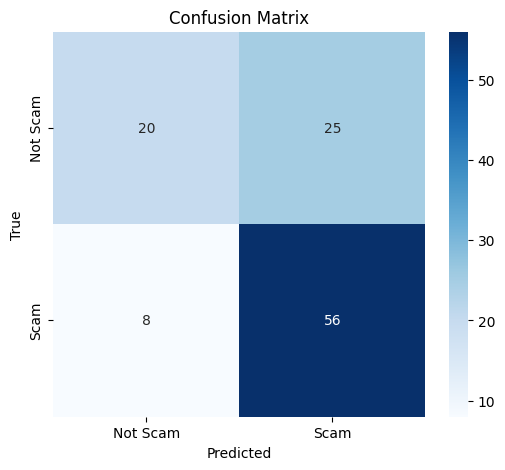

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Scam', 'Scam'], yticklabels=['Not Scam', 'Scam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.44      0.55        45
           1       0.69      0.88      0.77        64

    accuracy                           0.70       109
   macro avg       0.70      0.66      0.66       109
weighted avg       0.70      0.70      0.68       109



In [ ]:
# Calculate predicted probabilities
y_pred_proba = clf.predict_proba(X_test_combined)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC score
roc_auc = auc(fpr, tpr)

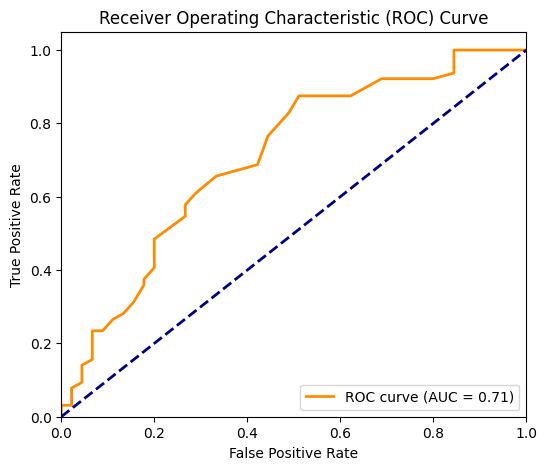

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.70
Precision: 0.69
Recall: 0.88
F1 Score: 0.77


**checking the compatibility between the input data**

In [ ]:
text_vector = tfidf.transform(x_text_test)
scam_model = RandomForestClassifier(random_state=42)
scam_model.fit(X_train_combined, y_train)

print("Sample text data for testing:")
print(x_text_test.head())
print("\nSample numeric data for testing:")
print(x_numeric_test.head())

Sample text data for testing:
316    massive increase in crypto scam adds on youtub...
77     i gave my personal info to a usps scam what to...
360    whats the point of this scam  i just got a pet...
90     realty scam but maybe within a scam i have a v...
493    franky shaw please dont waste your money on hi...
Name: full_text, dtype: object

Sample numeric data for testing:
        score  upvote_ratio  num_comments
316  0.012512      0.876404      0.046610
77   0.000000      0.213483      0.042373
360  0.000000      0.359551      0.008475
90   0.000463      0.516854      0.006356
493  0.000000      0.348315      0.025424


In [ ]:
# Combine text features with numeric features if applicable
test_combined = np.hstack((text_vector.toarray(), x_numeric_test.values))

# Check input shape compatibility
print(f"Train data shape: {X_train_combined.shape}")
print(f"Test data shape: {test_combined.shape}")
print("Input shape:", test_combined.shape)
print(f"Model expects {clf.n_features_in_} features.")
assert test_combined.shape[1] == scam_model.n_features_in_, "Feature mismatch!"

Train data shape: (436, 6157)
Test data shape: (109, 6157)
Input shape: (109, 6157)
Model expects 6157 features.


#XGBoost

In [ ]:
!pip install xgboost

In [ ]:
# Import libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False
)

In [ ]:
# Train the model
xgb_model.fit(X_train_combined, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test_combined)
y_pred_proba = xgb_model.predict_proba(X_test_combined)[:, 1]  # For ROC AUC or probability thresholding

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:40:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7155963302752294
Precision: 0.726027397260274
Recall: 0.828125
F1 Score: 0.7737226277372263
ROC AUC Score: 0.7326388888888888


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[25 20]
 [11 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.56      0.62        45
           1       0.73      0.83      0.77        64

    accuracy                           0.72       109
   macro avg       0.71      0.69      0.70       109
weighted avg       0.71      0.72      0.71       109



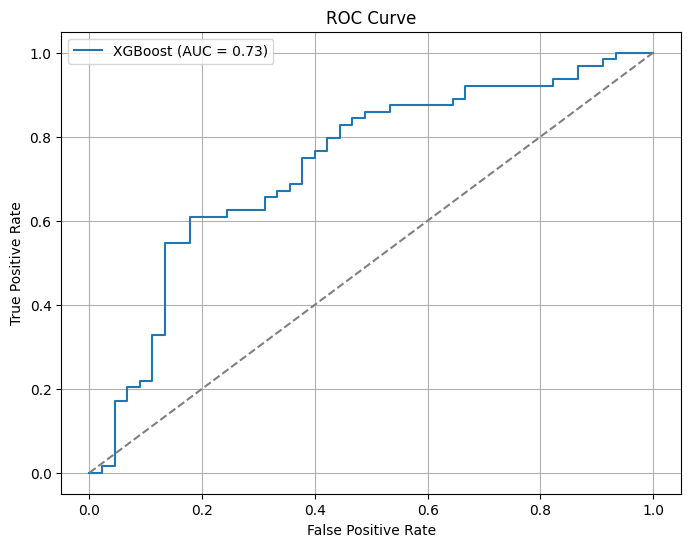

In [ ]:
# Plot ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import joblib

# Save the trained model and TF-IDF vectorizer
joblib.dump(xgb_model, "xgboost_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer_xgboost.pkl")

['tfidf_vectorizer_xgboost.pkl']

In [ ]:
import joblib   # Save the model

In [ ]:
joblib.dump(clf, 'scam_detection_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
rf_model = joblib.load('scam_detection_model.pkl')
tfidf_model = joblib.load('tfidf_vectorizer.pkl')

In [ ]:
new_post = "Congratulations! You've won a free gift card."
new_text_tfidf = tfidf_model.transform([new_post])
new_features = np.hstack((new_text_tfidf.toarray(), np.array([[0.8, 0.9, 100]])))
prediction = rf_model.predict(new_features)
print("Prediction:", "Scam" if prediction[0] == 1 else "Not Scam")

Prediction: Scam


In [ ]:
# str1 = '{2}, {1} and {0}'.format('a', 'b', 'c')
# str2 = '{0}{1}{0}'.format('abrc', 'cad')
# print(str1, str2)
# a = 2
# b = '3.77'
# c = -8
# str1 = '{0:.4f} {0:3d} {2} {1}'.format(a, b, c)
# print(str1)
line = "I'll come by then."
eline = ""
for i in line:
    eline += chr(ord(i)+3)
print(eline)

L*oo#frph#e|#wkhq1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data_path ="C:\Users\bharg\Downloads\Rotten_Tomatoes_Movies3 (1).xlsx"
df = pd.read_excel(data_path)

# Handle missing values
numeric_columns = ['audience_rating', 'runtime_in_minutes']
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

categorical_columns = ['genre', 'directors', 'writers', 'studio_name']
for col in categorical_columns:
    df[col] = df[col].fillna('Unknown')

# Drop less relevant columns
columns_to_drop = ['movie_info', 'critics_consensus', 'cast', 'in_theaters_date', 'on_streaming_date', 'movie_title']
df.drop(columns=columns_to_drop, inplace=True)

# Define features and target
features = [col for col in df.columns if col != 'audience_rating']
target = 'audience_rating'
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline: OneHotEncoding for categorical variables
categorical_features = ['rating', 'genre', 'directors', 'writers', 'studio_name', 'tomatometer_status']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', max_categories=20), categorical_features)
    ],
    remainder='passthrough'
)

# Gradient Boosting Regressor with hyperparameter tuning
model = GradientBoostingRegressor(random_state=42)
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)

# Train the model with grid search
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

# Visualization: Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Audience Rating')
plt.ylabel('Predicted Audience Rating')
plt.title('Actual vs Predicted Audience Ratings')
plt.show()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-20-314e847feb7c>, line 11)